
# Project: Investigate a Dataset (FBI Gun Data Analysis)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> The data comes from the FBI's National Instant Criminal Background Check System. The NICS is used by to determine whether a prospective buyer is eligible to buy firearms or explosives. Gun shops call into this system to ensure that each customer does not have a criminal record or isn’t otherwise ineligible to make a purchase. The data has been supplemented with state level data from census.gov.

> The types of firearms are defined by the Bureau of Alcohol, Tobacco, Firearms and Explosives as follows:

>> * Handgun—(a) any firearm which has a short stock and is designed to be held and fired by the use of a single hand; and (b) any combination of parts from which a firearm described in paragraph (a) can be assembled.

>> * Long Gun—a weapon designed or redesigned, made or remade, and intended to be fired from the shoulder, and designed or redesigned and made or remade to use the energy of the explosive in (a) a fixed metallic cartridge to fire a single projectile through a rifled bore for each single pull of the trigger; or (b) a fixed shotgun shell to fire through a smooth bore either a number of ball shot or a single projectile for each single pull of the trigger.

>> * Other—refers to frames, receivers, and other firearms that are neither handguns nor long guns (rifles or shotguns), such as firearms having a pistol grip that expel a shotgun shell, or National Firearms Act firearms, including silencers.

> Second, another dataset is named (US CENSUS DATA), this data shows brief information about the population of US citizens in each state. the data describe lots of details about the race of the citizens and whether they have a home or not in the USA and if there are from Africa or Asia or not ... etc. the description of the population was given in rows and the name of states was used in each column to gave the total number of there own population.

### Question(s) for Analysis

>>> * What census data is most associated with high gun per capita?
>>> * Which states have had the highest growth in gun registrations
>>> * What is the overall trend of gun purchases?
>>> * Ratio of Firms owned by veterans and Non-veterans
>>> * Total gun purchase per month

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as axes
import seaborn as sns
%matplotlib inline

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

df_gun = pd.read_csv("gun_data.csv")
df_gun.head(2)

month    state   permit  permit_recheck  handgun  long_gun  other  \
0  2017-09  Alabama  16717.0             0.0   5734.0    6320.0  221.0   
1  2017-09   Alaska    209.0             2.0   2320.0    2930.0  219.0   

   multiple  admin  prepawn_handgun  ...  returned_other  rentals_handgun  \
0       317    0.0             15.0  ...             0.0              0.0   
1       160    0.0              5.0  ...             0.0              0.0   

   rentals_long_gun  private_sale_handgun  private_sale_long_gun  \
0               0.0                   9.0                   16.0   
1               0.0                  17.0                   24.0   

   private_sale_other  return_to_seller_handgun  return_to_seller_long_gun  \
0                 3.0                       0.0                        0.0   
1                 1.0                       0.0                        0.0   

   return_to_seller_other  totals  
0                     3.0   32019  
1                     0.0    6303  

[2 rows x 27 columns]

In [3]:
df_census = pd.read_csv("Census_data.csv")
df_census.head(2)

Fact Fact Note    Alabama  \
0       Population estimates, July 1, 2016,  (V2016)       NaN  4,863,300   
1  Population estimates base, April 1, 2010,  (V2...       NaN  4,780,131   

    Alaska    Arizona   Arkansas  California   Colorado Connecticut Delaware  \
0  741,894  6,931,071  2,988,248  39,250,017  5,540,545   3,576,452  952,065   
1  710,249  6,392,301  2,916,025  37,254,522  5,029,324   3,574,114  897,936   

   ... South Dakota Tennessee       Texas       Utah  Vermont   Virginia  \
0  ...       865454   6651194  27,862,596  3,051,217  624,594  8,411,808   
1  ...       814195   6346298  25,146,100  2,763,888  625,741  8,001,041   

  Washington West Virginia  Wisconsin  Wyoming  
0  7,288,000     1,831,102  5,778,708  585,501  
1  6,724,545     1,853,011  5,687,289  563,767  

[2 rows x 52 columns]

In [4]:
df_gun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      12485 non-null  object 
 1   state                      12485 non-null  object 
 2   permit                     12461 non-null  float64
 3   permit_recheck             1100 non-null   float64
 4   handgun                    12465 non-null  float64
 5   long_gun                   12466 non-null  float64
 6   other                      5500 non-null   float64
 7   multiple                   12485 non-null  int64  
 8   admin                      12462 non-null  float64
 9   prepawn_handgun            10542 non-null  float64
 10  prepawn_long_gun           10540 non-null  float64
 11  prepawn_other              5115 non-null   float64
 12  redemption_handgun         10545 non-null  float64
 13  redemption_long_gun        10544 non-null  flo

In [5]:
df_census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 52 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Fact            80 non-null     object
 1   Fact Note       28 non-null     object
 2   Alabama         65 non-null     object
 3   Alaska          65 non-null     object
 4   Arizona         65 non-null     object
 5   Arkansas        65 non-null     object
 6   California      65 non-null     object
 7   Colorado        65 non-null     object
 8   Connecticut     65 non-null     object
 9   Delaware        65 non-null     object
 10  Florida         65 non-null     object
 11  Georgia         65 non-null     object
 12  Hawaii          65 non-null     object
 13  Idaho           65 non-null     object
 14  Illinois        65 non-null     object
 15  Indiana         65 non-null     object
 16  Iowa            65 non-null     object
 17  Kansas          65 non-null     object
 18  Kentucky    

In [6]:
# -- check for duplicated row in census data
sum(df_census.duplicated())

3

In [7]:
# -- check for duplicated row in gun data
sum(df_gun.duplicated())

0

In [8]:
# list null rows
df_gun[df_gun.isna().any(axis=1)]

month          state   permit  permit_recheck  handgun  long_gun  \
770    2016-07        Alabama  27765.0             0.0  10132.0    7392.0   
771    2016-07         Alaska    215.0             0.0   2898.0    2816.0   
772    2016-07        Arizona   7863.0           308.0  13693.0    8643.0   
773    2016-07       Arkansas   4116.0           677.0   6323.0    5053.0   
774    2016-07     California  77962.0             0.0  46361.0   47594.0   
...        ...            ...      ...             ...      ...       ...   
12480  1998-11       Virginia      0.0             NaN     14.0       2.0   
12481  1998-11     Washington      1.0             NaN     65.0     286.0   
12482  1998-11  West Virginia      3.0             NaN    149.0     251.0   
12483  1998-11      Wisconsin      0.0             NaN     25.0     214.0   
12484  1998-11        Wyoming      8.0             NaN     45.0      49.0   

         other  multiple  admin  prepawn_handgun  ...  returned_other  \
770      538.0       465    0.0              5.0  ...             0.0   
771      239.0       165    0.0              7.0  ...             0.0   
772     1283.0       642    0.0              5.0  ...             0.0   
773      325.0       367    2.0              6.0  ...             0.0   
774    17297.0         0    0.0              0.0  ...             0.0   
...        ...       ...    ...              ...  ...             ...   
12480      NaN         8    0.0              NaN  ...             NaN   
12481      NaN         8    1.0              NaN  ...             NaN   
12482      NaN         5    0.0              NaN  ...             NaN   
12483      NaN         2    0.0              NaN  ...             NaN   
12484      NaN         5    0.0              NaN  ...             NaN   

       rentals_handgun  rentals_long_gun  private_sale_handgun  \
770                NaN               NaN                   9.0   
771                NaN               NaN                   7.0   
772                NaN               NaN                  13.0   
773                NaN               NaN                   7.0   
774                NaN               NaN                   0.0   
...                ...               ...                   ...   
12480              NaN               NaN                   NaN   
12481              NaN               NaN                   NaN   
12482              NaN               NaN                   NaN   
12483              NaN               NaN                   NaN   
12484              NaN               NaN                   NaN   

       private_sale_long_gun  private_sale_other  return_to_seller_handgun  \
770                      5.0                 0.0                       1.0   
771                     17.0                 0.0                       1.0   
772                      9.0                 0.0                       0.0   
773                      5.0                 1.0                       0.0   
774                      0.0                 0.0                       0.0   
...                      ...                 ...                       ...   
12480                    NaN                 NaN                       NaN   
12481                    NaN                 NaN                       NaN   
12482                    NaN                 NaN                       NaN   
12483                    NaN                 NaN                       NaN   
12484                    NaN                 NaN                       NaN   

       return_to_seller_long_gun  return_to_seller_other  totals  
770                          1.0                     0.0   48927  
771                          0.0                     0.0    6793  
772                          1.0                     0.0   34496  
773                          1.0                     0.0   19378  
774                          0.0                     0.0  190218  
...                          ...                     ...     ...  
12480   

In [9]:
#  Statistical Description
df_gun.describe()

permit  permit_recheck        handgun       long_gun  \
count   12461.000000     1100.000000   12465.000000   12466.000000   
mean     6413.629404     1165.956364    5940.881107    7810.847585   
std     23752.338269     9224.200609    8618.584060    9309.846140   
min         0.000000        0.000000       0.000000       0.000000   
25%         0.000000        0.000000     865.000000    2078.250000   
50%       518.000000        0.000000    3059.000000    5122.000000   
75%      4272.000000        0.000000    7280.000000   10380.750000   
max    522188.000000   116681.000000  107224.000000  108058.000000   

              other      multiple         admin  prepawn_handgun  \
count   5500.000000  12485.000000  12462.000000     10542.000000   
mean     360.471636    268.603364     58.898090         4.828021   
std     1349.478273    783.185073    604.814818        10.907756   
min        0.000000      0.000000      0.000000         0.000000   
25%       17.000000     15.000000      0.000000         0.000000   
50%      121.000000    125.000000      0.000000         0.000000   
75%      354.000000    301.000000      0.000000         5.000000   
max    77929.000000  38907.000000  28083.000000       164.000000   

       prepawn_long_gun  prepawn_other  ...  returned_other  rentals_handgun  \
count      10540.000000    5115.000000  ...     1815.000000       990.000000   
mean           7.834156       0.165591  ...        1.027548         0.076768   
std           16.468028       1.057105  ...        4.386296         0.634503   
min            0.000000       0.000000  ...        0.000000         0.000000   
25%            0.000000       0.000000  ...        0.000000         0.000000   
50%            1.000000       0.000000  ...        0.000000         0.000000   
75%            8.000000       0.000000  ...        0.000000         0.000000   
max          269.000000      49.000000  ...       64.000000        12.000000   

       rentals_long_gun  private_sale_handgun  private_sale_long_gun  \
count        825.000000           2750.000000            2750.000000   
mean           0.087273             14.936000              11.602909   
std            0.671649             71.216021              54.253090   
min            0.000000              0.000000               0.000000   
25%            0.000000              0.000000               0.000000   
50%            0.000000              0.000000               0.000000   
75%            0.000000              2.000000               4.000000   
max           12.000000           1017.000000             777.000000   

       private_sale_other  return_to_seller_handgun  \
count         2750.000000               2475.000000   
mean             1.030182                  0.402020   
std              4.467843                  1.446568   
min              0.000000                  0.000000   
25%              0.000000                  0.000000   
50%              0.000000                  0.000000   
75%              0.000000                  0.000000   
max             71.000000                 28.000000   

       return_to_seller_long_gun  return_to_seller_other         totals  
count                2750.000000             2255.000000   12485.000000  
mean                    0.441818                0.105987   21595.725911  
std                     1.528223                0.427363   32591.418387  
min                     0.000000                0.000000       0.000000  
25%                     0.000000                0.000000    4638.000000  
50%                     0.000000                0.000000   12399.000000  
75%                     0.000000                0.000000   25453.000000  
max                    17.000000                4.000000  541978.000000  

[8 rows x 25 columns]

In [10]:
#  Statistical Description
df_census.describe()

Fact Fact Note    Alabama  \
count                                             80        28         65   
unique                                            80        15         65   
top     Population estimates, July 1, 2016,  (V2016)       (c)  4,863,300   
freq                                               1         6          1   

       Alaska Arizona Arkansas California Colorado Connecticut Delaware  ...  \
count      65      65       65         65       65          65       65  ...   
unique     64      64       64         63       64          63       64  ...   
top     7.30%  50.30%   50.90%      6.80%    3.30%       0.10%   51.60%  ...   
freq        2       2        2          2        2           2        2  ...   

       South Dakota Tennessee   Texas   Utah Vermont   Virginia Washington  \
count            65        65      65     65      65         65         65   
unique           65        64      64     64      63         65         65   
top          865454     0.048  50.40%  2.50%   1.90%  8,411,808  7,288,000   
freq              1         2       2      2       2          1          1   

       West Virginia  Wisconsin Wyoming  
count             65         65      65  
unique            64         65      64  
top            1.50%  5,778,708   7.10%  
freq               2          1       2  

[4 rows x 52 columns]

In [11]:
#  Columns with null values
df_gun.isna().sum()

month                            0
state                            0
permit                          24
permit_recheck               11385
handgun                         20
long_gun                        19
other                         6985
multiple                         0
admin                           23
prepawn_handgun               1943
prepawn_long_gun              1945
prepawn_other                 7370
redemption_handgun            1940
redemption_long_gun           1941
redemption_other              7370
returned_handgun             10285
returned_long_gun            10340
returned_other               10670
rentals_handgun              11495
rentals_long_gun             11660
private_sale_handgun          9735
private_sale_long_gun         9735
private_sale_other            9735
return_to_seller_handgun     10010
return_to_seller_long_gun     9735
return_to_seller_other       10230
totals                           0
dtype: int64

In [12]:
#  Columns with null values
df_census.isna().sum()

Fact               5
Fact Note         57
Alabama           20
Alaska            20
Arizona           20
Arkansas          20
California        20
Colorado          20
Connecticut       20
Delaware          20
Florida           20
Georgia           20
Hawaii            20
Idaho             20
Illinois          20
Indiana           20
Iowa              20
Kansas            20
Kentucky          20
Louisiana         20
Maine             20
Maryland          20
Massachusetts     20
Michigan          20
Minnesota         20
Mississippi       20
Missouri          20
Montana           20
Nebraska          20
Nevada            20
New Hampshire     20
New Jersey        20
New Mexico        20
New York          20
North Carolina    20
North Dakota      20
Ohio              20
Oklahoma          20
Oregon            20
Pennsylvania      20
Rhode Island      20
South Carolina    20
South Dakota      20
Tennessee         20
Texas             20
Utah              20
Vermont           20
Virginia     

In [13]:
# size of the Data
df_gun.shape

(12485, 27)

In [14]:
# size of the Data
df_census.shape

(85, 52)

### Data Cleaning (FBI Gun Data and U.S. census Data)
#### Things that require cleaning
* Drop NaN rows in df_census
* Drop fact note columns in df_census
* Fix month column datatype in df_gun
* Drop duplicates for census data
* In df_gun remove rows that have totals == 0
* percentage sign and fix values
* Drop unnessary colums

### Fix month column datatype in df_gun

In [15]:
# Fix month column datatype in df_gun
# convert month from object to datetime
df_month = df_gun.month
df_month = pd.to_datetime(df_month)
df_month.head()
df_gun['month'] = df_month
df_gun.dtypes

month                        datetime64[ns]
state                                object
permit                              float64
permit_recheck                      float64
handgun                             float64
long_gun                            float64
other                               float64
multiple                              int64
admin                               float64
prepawn_handgun                     float64
prepawn_long_gun                    float64
prepawn_other                       float64
redemption_handgun                  float64
redemption_long_gun                 float64
redemption_other                    float64
returned_handgun                    float64
returned_long_gun                   float64
returned_other                      float64
rentals_handgun                     float64
rentals_long_gun                    float64
private_sale_handgun                float64
private_sale_long_gun               float64
private_sale_other              

### Drop duplicates for census and gun data

In [16]:
# check for duplicates and drop duplicates for gun data
df_gun.duplicated().sum()

0

In [17]:
# Drop duplicates for census data

df_census = df_census.drop_duplicates()

print (df_census.duplicated().sum())

0


### Replace NAN columns with mean in gun table

In [18]:
# check for NaN fields in gun data and replace with mean columns
df_gun.isna().sum().sum()

154595

In [19]:
# replace NaN fields with mean column
gun_means = df_gun.mean()
df_gun= df_gun.fillna(gun_means)

C:\Users\HP\AppData\Local\Temp\ipykernel_2804\3213998980.py:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  gun_means = df_gun.mean()
C:\Users\HP\AppData\Local\Temp\ipykernel_2804\3213998980.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  gun_means = df_gun.mean()


In [20]:
df_gun.isna().sum()

month                        0
state                        0
permit                       0
permit_recheck               0
handgun                      0
long_gun                     0
other                        0
multiple                     0
admin                        0
prepawn_handgun              0
prepawn_long_gun             0
prepawn_other                0
redemption_handgun           0
redemption_long_gun          0
redemption_other             0
returned_handgun             0
returned_long_gun            0
returned_other               0
rentals_handgun              0
rentals_long_gun             0
private_sale_handgun         0
private_sale_long_gun        0
private_sale_other           0
return_to_seller_handgun     0
return_to_seller_long_gun    0
return_to_seller_other       0
totals                       0
dtype: int64

In [21]:
# To further check if there are null values
df_gun.isna().sum().sum()

0

In [22]:
# check for NaN fields in census data and replace with mean columns
df_census.isna().sum().sum()

906

### Fill NAN columns with Zero in Census table

In [23]:
# replace NaN fields with zero 
df_census= df_census.fillna(0)

In [24]:
# To further check if there are null values
df_census.isna().sum().sum()

0

### Fix gun colunms as intergers instead of floats

In [25]:
df_gun.dtypes

month                        datetime64[ns]
state                                object
permit                              float64
permit_recheck                      float64
handgun                             float64
long_gun                            float64
other                               float64
multiple                              int64
admin                               float64
prepawn_handgun                     float64
prepawn_long_gun                    float64
prepawn_other                       float64
redemption_handgun                  float64
redemption_long_gun                 float64
redemption_other                    float64
returned_handgun                    float64
returned_long_gun                   float64
returned_other                      float64
rentals_handgun                     float64
rentals_long_gun                    float64
private_sale_handgun                float64
private_sale_long_gun               float64
private_sale_other              

In [26]:
# fix gun colunms as intergers instead of floats
# first we select the required columns
df_guns = df_gun.loc[:, ['permit', 'permit_recheck', 'handgun','long_gun','other','admin','prepawn_handgun','prepawn_long_gun',            
'prepawn_other','redemption_handgun', 'redemption_long_gun','redemption_other','returned_handgun','returned_long_gun' ,          
'returned_other','rentals_handgun', 'rentals_long_gun', 'private_sale_handgun' , 'private_sale_long_gun',        
'private_sale_other', 'return_to_seller_handgun',  'return_to_seller_long_gun','return_to_seller_other']]

In [27]:
# Now we convert those columns as integers
df_guns =df_guns.astype(int)

In [28]:
# Check to confirm if there are correctly changed
df_guns.dtypes

permit                       int32
permit_recheck               int32
handgun                      int32
long_gun                     int32
other                        int32
admin                        int32
prepawn_handgun              int32
prepawn_long_gun             int32
prepawn_other                int32
redemption_handgun           int32
redemption_long_gun          int32
redemption_other             int32
returned_handgun             int32
returned_long_gun            int32
returned_other               int32
rentals_handgun              int32
rentals_long_gun             int32
private_sale_handgun         int32
private_sale_long_gun        int32
private_sale_other           int32
return_to_seller_handgun     int32
return_to_seller_long_gun    int32
return_to_seller_other       int32
dtype: object

In [29]:
# Now we replace them in the former table
df_gun.loc[:, ['permit', 'permit_recheck', 'handgun','long_gun','other','admin','prepawn_handgun','prepawn_long_gun',            
'prepawn_other','redemption_handgun', 'redemption_long_gun','redemption_other','returned_handgun','returned_long_gun' ,          
'returned_other','rentals_handgun', 'rentals_long_gun', 'private_sale_handgun' , 'private_sale_long_gun',        
'private_sale_other', 'return_to_seller_handgun',  'return_to_seller_long_gun','return_to_seller_other']] = df_guns.loc[:, ['permit', 'permit_recheck', 'handgun','long_gun','other','admin','prepawn_handgun','prepawn_long_gun',            
'prepawn_other','redemption_handgun', 'redemption_long_gun','redemption_other','returned_handgun','returned_long_gun' ,          
'returned_other','rentals_handgun', 'rentals_long_gun', 'private_sale_handgun' , 'private_sale_long_gun',        
'private_sale_other', 'return_to_seller_handgun',  'return_to_seller_long_gun','return_to_seller_other']]

df_gun.head()

month       state  permit  permit_recheck  handgun  long_gun  other  \
0 2017-09-01     Alabama   16717               0     5734      6320    221   
1 2017-09-01      Alaska     209               2     2320      2930    219   
2 2017-09-01     Arizona    5069             382    11063      7946    920   
3 2017-09-01    Arkansas    2935             632     4347      6063    165   
4 2017-09-01  California   57839               0    37165     24581   2984   

   multiple  admin  prepawn_handgun  ...  returned_other  rentals_handgun  \
0       317      0               15  ...               0                0   
1       160      0                5  ...               0                0   
2       631      0               13  ...               0                0   
3       366     51               12  ...               0                0   
4         0      0                0  ...               0                0   

   rentals_long_gun  private_sale_handgun  private_sale_long_gun  \
0                 0                     9                     16   
1                 0                    17                     24   
2                 0                    38                     12   
3                 0                    13                     23   
4                 0                     0                      0   

   private_sale_other  return_to_seller_handgun  return_to_seller_long_gun  \
0                   3                         0                          0   
1                   1                         0                          0   
2                   2                         0                          0   
3                   0                         0                          2   
4                   0                         0                          0   

   return_to_seller_other  totals  
0                       3   32019  
1                       0    6303  
2                       0   28394  
3                       1   17747  
4                       0  123506  

[5 rows x 27 columns]

In [30]:
# now we check if they are correctly fixed
df_gun.dtypes

month                        datetime64[ns]
state                                object
permit                                int32
permit_recheck                        int32
handgun                               int32
long_gun                              int32
other                                 int32
multiple                              int64
admin                                 int32
prepawn_handgun                       int32
prepawn_long_gun                      int32
prepawn_other                         int32
redemption_handgun                    int32
redemption_long_gun                   int32
redemption_other                      int32
returned_handgun                      int32
returned_long_gun                     int32
returned_other                        int32
rentals_handgun                       int32
rentals_long_gun                      int32
private_sale_handgun                  int32
private_sale_long_gun                 int32
private_sale_other              

In [31]:
df_census.head(2)

Fact Fact Note    Alabama  \
0       Population estimates, July 1, 2016,  (V2016)         0  4,863,300   
1  Population estimates base, April 1, 2010,  (V2...         0  4,780,131   

    Alaska    Arizona   Arkansas  California   Colorado Connecticut Delaware  \
0  741,894  6,931,071  2,988,248  39,250,017  5,540,545   3,576,452  952,065   
1  710,249  6,392,301  2,916,025  37,254,522  5,029,324   3,574,114  897,936   

   ... South Dakota Tennessee       Texas       Utah  Vermont   Virginia  \
0  ...       865454   6651194  27,862,596  3,051,217  624,594  8,411,808   
1  ...       814195   6346298  25,146,100  2,763,888  625,741  8,001,041   

  Washington West Virginia  Wisconsin  Wyoming  
0  7,288,000     1,831,102  5,778,708  585,501  
1  6,724,545     1,853,011  5,687,289  563,767  

[2 rows x 52 columns]

In [32]:
df_gun.head(2)

month    state  permit  permit_recheck  handgun  long_gun  other  \
0 2017-09-01  Alabama   16717               0     5734      6320    221   
1 2017-09-01   Alaska     209               2     2320      2930    219   

   multiple  admin  prepawn_handgun  ...  returned_other  rentals_handgun  \
0       317      0               15  ...               0                0   
1       160      0                5  ...               0                0   

   rentals_long_gun  private_sale_handgun  private_sale_long_gun  \
0                 0                     9                     16   
1                 0                    17                     24   

   private_sale_other  return_to_seller_handgun  return_to_seller_long_gun  \
0                   3                         0                          0   
1                   1                         0                          0   

   return_to_seller_other  totals  
0                       3   32019  
1                       0    6303  

[2 rows x 27 columns]

### Drop "Fact Note"

In [33]:
df_census = df_census.drop(columns="Fact Note")
df_census.head(0)

Empty DataFrame
Columns: [Fact, Alabama, Alaska, Arizona, Arkansas, California, Colorado, Connecticut, Delaware, Florida, Georgia, Hawaii, Idaho, Illinois, Indiana, Iowa, Kansas, Kentucky, Louisiana, Maine, Maryland, Massachusetts, Michigan, Minnesota, Mississippi, Missouri, Montana, Nebraska, Nevada, New Hampshire, New Jersey, New Mexico, New York, North Carolina, North Dakota, Ohio, Oklahoma, Oregon, Pennsylvania, Rhode Island, South Carolina, South Dakota, Tennessee, Texas, Utah, Vermont, Virginia, Washington, West Virginia, Wisconsin, Wyoming]
Index: []

[0 rows x 51 columns]

In [34]:
df_gun.dtypes

month                        datetime64[ns]
state                                object
permit                                int32
permit_recheck                        int32
handgun                               int32
long_gun                              int32
other                                 int32
multiple                              int64
admin                                 int32
prepawn_handgun                       int32
prepawn_long_gun                      int32
prepawn_other                         int32
redemption_handgun                    int32
redemption_long_gun                   int32
redemption_other                      int32
returned_handgun                      int32
returned_long_gun                     int32
returned_other                        int32
rentals_handgun                       int32
rentals_long_gun                      int32
private_sale_handgun                  int32
private_sale_long_gun                 int32
private_sale_other              

### Split month column to year, month and day

In [35]:
 df_gun['year'] = df_gun['month'].dt.year

In [36]:
 df_gun['months'] = df_gun['month'].dt.month

In [37]:
 df_gun['day'] = df_gun['month'].dt.day

In [38]:
df_gun.head()

month       state  permit  permit_recheck  handgun  long_gun  other  \
0 2017-09-01     Alabama   16717               0     5734      6320    221   
1 2017-09-01      Alaska     209               2     2320      2930    219   
2 2017-09-01     Arizona    5069             382    11063      7946    920   
3 2017-09-01    Arkansas    2935             632     4347      6063    165   
4 2017-09-01  California   57839               0    37165     24581   2984   

   multiple  admin  prepawn_handgun  ...  private_sale_handgun  \
0       317      0               15  ...                     9   
1       160      0                5  ...                    17   
2       631      0               13  ...                    38   
3       366     51               12  ...                    13   
4         0      0                0  ...                     0   

   private_sale_long_gun  private_sale_other  return_to_seller_handgun  \
0                     16                   3                         0   
1                     24                   1                         0   
2                     12                   2                         0   
3                     23                   0                         0   
4                      0                   0                         0   

   return_to_seller_long_gun  return_to_seller_other  totals  year  months  \
0                          0                       3   32019  2017       9   
1                          0                       0    6303  2017       9   
2                          0                       0   28394  2017       9   
3                          2                       1   17747  2017       9   
4                          0                       0  123506  2017       9   

   day  
0    1  
1    1  
2    1  
3    1  
4    1  

[5 rows x 30 columns]

In [39]:
df_gun.columns

Index(['month', 'state', 'permit', 'permit_recheck', 'handgun', 'long_gun',
       'other', 'multiple', 'admin', 'prepawn_handgun', 'prepawn_long_gun',
       'prepawn_other', 'redemption_handgun', 'redemption_long_gun',
       'redemption_other', 'returned_handgun', 'returned_long_gun',
       'returned_other', 'rentals_handgun', 'rentals_long_gun',
       'private_sale_handgun', 'private_sale_long_gun', 'private_sale_other',
       'return_to_seller_handgun', 'return_to_seller_long_gun',
       'return_to_seller_other', 'totals', 'year', 'months', 'day'],
      dtype='object')

In [40]:
df_gun = df_gun[['year', 'months', 'day', 'state', 'permit', 'permit_recheck', 'handgun', 'long_gun',
       'other', 'multiple', 'admin', 'prepawn_handgun', 'prepawn_long_gun',
       'prepawn_other', 'redemption_handgun', 'redemption_long_gun',
       'redemption_other', 'returned_handgun', 'returned_long_gun',
       'returned_other', 'rentals_handgun', 'rentals_long_gun',
       'private_sale_handgun', 'private_sale_long_gun', 'private_sale_other',
       'return_to_seller_handgun', 'return_to_seller_long_gun',
       'return_to_seller_other', 'totals']]

In [41]:
df_gun.head(2)

year  months  day    state  permit  permit_recheck  handgun  long_gun  \
0  2017       9    1  Alabama   16717               0     5734      6320   
1  2017       9    1   Alaska     209               2     2320      2930   

   other  multiple  ...  returned_other  rentals_handgun  rentals_long_gun  \
0    221       317  ...               0                0                 0   
1    219       160  ...               0                0                 0   

   private_sale_handgun  private_sale_long_gun  private_sale_other  \
0                     9                     16                   3   
1                    17                     24                   1   

   return_to_seller_handgun  return_to_seller_long_gun  \
0                         0                          0   
1                         0                          0   

   return_to_seller_other  totals  
0                       3   32019  
1                       0    6303  

[2 rows x 29 columns]

In [42]:
df_census.head()

Fact    Alabama   Alaska  \
0       Population estimates, July 1, 2016,  (V2016)  4,863,300  741,894   
1  Population estimates base, April 1, 2010,  (V2...  4,780,131  710,249   
2  Population, percent change - April 1, 2010 (es...      1.70%    4.50%   
3                  Population, Census, April 1, 2010  4,779,736  710,231   
4  Persons under 5 years, percent, July 1, 2016, ...      6.00%    7.30%   

     Arizona   Arkansas  California   Colorado Connecticut Delaware  \
0  6,931,071  2,988,248  39,250,017  5,540,545   3,576,452  952,065   
1  6,392,301  2,916,025  37,254,522  5,029,324   3,574,114  897,936   
2      8.40%      2.50%       5.40%     10.20%       0.10%    6.00%   
3  6,392,017  2,915,918  37,253,956  5,029,196   3,574,097  897,934   
4      6.30%      6.40%       6.30%      6.10%       5.20%    5.80%   

      Florida  ... South Dakota Tennessee       Texas       Utah  Vermont  \
0  20,612,439  ...       865454   6651194  27,862,596  3,051,217  624,594   
1  18,804,592  ...       814195   6346298  25,146,100  2,763,888  625,741   
2       9.60%  ...        0.063     0.048      10.80%     10.40%   -0.20%   
3  18,801,310  ...       814180   6346105  25,145,561  2,763,885  625,741   
4       5.50%  ...        0.071     0.061       7.20%      8.30%    4.90%   

    Virginia Washington West Virginia  Wisconsin  Wyoming  
0  8,411,808  7,288,000     1,831,102  5,778,708  585,501  
1  8,001,041  6,724,545     1,853,011  5,687,289  563,767  
2      5.10%      8.40%        -1.20%      1.60%    3.90%  
3  8,001,024  6,724,540     1,852,994  5,686,986  563,626  
4      6.10%      6.20%         5.50%      5.80%    6.50%  

[5 rows x 51 columns]

In [43]:
list(df_census.columns)

['Fact',
 'Alabama',
 'Alaska',
 'Arizona',
 'Arkansas',
 'California',
 'Colorado',
 'Connecticut',
 'Delaware',
 'Florida',
 'Georgia',
 'Hawaii',
 'Idaho',
 'Illinois',
 'Indiana',
 'Iowa',
 'Kansas',
 'Kentucky',
 'Louisiana',
 'Maine',
 'Maryland',
 'Massachusetts',
 'Michigan',
 'Minnesota',
 'Mississippi',
 'Missouri',
 'Montana',
 'Nebraska',
 'Nevada',
 'New Hampshire',
 'New Jersey',
 'New Mexico',
 'New York',
 'North Carolina',
 'North Dakota',
 'Ohio',
 'Oklahoma',
 'Oregon',
 'Pennsylvania',
 'Rhode Island',
 'South Carolina',
 'South Dakota',
 'Tennessee',
 'Texas',
 'Utah',
 'Vermont',
 'Virginia',
 'Washington',
 'West Virginia',
 'Wisconsin',
 'Wyoming']

### Reshape The census table

In [44]:
df_census.set_index('Fact', inplace=True) 

In [45]:
df_census = df_census.T.reset_index()

In [46]:
df_census.rename(columns={'index': 'state'}, inplace=True)

In [47]:
df_census.head()

Fact       state Population estimates, July 1, 2016,  (V2016)  \
0        Alabama                                    4,863,300   
1         Alaska                                      741,894   
2        Arizona                                    6,931,071   
3       Arkansas                                    2,988,248   
4     California                                   39,250,017   

Fact Population estimates base, April 1, 2010,  (V2016)  \
0                                             4,780,131   
1                                               710,249   
2                                             6,392,301   
3                                             2,916,025   
4                                            37,254,522   

Fact Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)  \
0                                                 1.70%                                      
1                                                 4.50%                                      
2                                                 8.40%                                      
3                                                 2.50%                                      
4                                                 5.40%                                      

Fact Population, Census, April 1, 2010  \
0                            4,779,736   
1                              710,231   
2                            6,392,017   
3                            2,915,918   
4                           37,253,956   

Fact Persons under 5 years, percent, July 1, 2016,  (V2016)  \
0                                                 6.00%       
1                                                 7.30%       
2                                                 6.30%       
3                                                 6.40%       
4                                                 6.30%       

Fact Persons under 5 years, percent, April 1, 2010  \
0                                            6.40%   
1                                            7.60%   
2                                            7.10%   
3                                            6.80%   
4                                            6.80%   

Fact Persons under 18 years, percent, July 1, 2016,  (V2016)  \
0                                                22.60%        
1                                                25.20%        
2                                                23.50%        
3                                                23.60%        
4                                                23.20%        

Fact Persons under 18 years, percent, April 1, 2010  \
0                                            23.70%   
1                                            26.40%   
2                                            25.50%   
3                                            24.40%   
4                                            25.00%   

Fact Persons 65 years and over, percent,  July 1, 2016,  (V2016)  ... (c)  \
0                                                16.10%           ...   0   
1                                                10.40%           ...   0   
2                                                16.90%           ...   0   
3                                                16.30%           ...   0   
4                                                13.60%           ...   0   

Fact Value Flags  -  D  F FN  0  S  X  Z  
0              0  0  0  0  0  0  0  0  0  
1              0  0  0  0  0  0  0  0  0  
2              0  0  0  0  0  0  0  0  0  
3              0  0  0  0  0  0  0  0  0  
4              0  0  0  0  0  0  0  0  0  

[5 rows x 83 columns]

### Reseting the index

In [48]:
df_census.columns.name = None
df_census = df_census.reset_index(drop=True)
df_census.head()

state Population estimates, July 1, 2016,  (V2016)  \
0     Alabama                                    4,863,300   
1      Alaska                                      741,894   
2     Arizona                                    6,931,071   
3    Arkansas                                    2,988,248   
4  California                                   39,250,017   

  Population estimates base, April 1, 2010,  (V2016)  \
0                                          4,780,131   
1                                            710,249   
2                                          6,392,301   
3                                          2,916,025   
4                                         37,254,522   

  Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)  \
0                                              1.70%                                      
1                                              4.50%                                      
2                                              8.40%                                      
3                                              2.50%                                      
4                                              5.40%                                      

  Population, Census, April 1, 2010  \
0                         4,779,736   
1                           710,231   
2                         6,392,017   
3                         2,915,918   
4                        37,253,956   

  Persons under 5 years, percent, July 1, 2016,  (V2016)  \
0                                              6.00%       
1                                              7.30%       
2                                              6.30%       
3                                              6.40%       
4                                              6.30%       

  Persons under 5 years, percent, April 1, 2010  \
0                                         6.40%   
1                                         7.60%   
2                                         7.10%   
3                                         6.80%   
4                                         6.80%   

  Persons under 18 years, percent, July 1, 2016,  (V2016)  \
0                                             22.60%        
1                                             25.20%        
2                                             23.50%        
3                                             23.60%        
4                                             23.20%        

  Persons under 18 years, percent, April 1, 2010  \
0                                         23.70%   
1                                         26.40%   
2                                         25.50%   
3                                         24.40%   
4                                         25.00%   

  Persons 65 years and over, percent,  July 1, 2016,  (V2016)  ... (c)  \
0                                             16.10%           ...   0   
1                                             10.40%           ...   0   
2                                             16.90%           ...   0   
3                                             16.30%           ...   0   
4                                             13.60%           ...   0   

  Value Flags  -  D  F FN  0  S  X  Z  
0           0  0  0  0  0  0  0  0  0  
1           0  0  0  0  0  0  0  0  0  
2           0  0  0  0  0  0  0  0  0  
3           0  0  0  0  0  0  0  0  0  
4           0  0  0  0  0  0  0  0  0  

[5 rows x 83 columns]

In [49]:
columns = df_census.columns[1:len(df_census.columns)-1]
columns

Index([                                          'Population estimates, July 1, 2016,  (V2016)',
                                           'Population estimates base, April 1, 2010,  (V2016)',
        'Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)',
                                                            'Population, Census, April 1, 2010',
                                       'Persons under 5 years, percent, July 1, 2016,  (V2016)',
                                                'Persons under 5 years, percent, April 1, 2010',
                                      'Persons under 18 years, percent, July 1, 2016,  (V2016)',
                                               'Persons under 18 years, percent, April 1, 2010',
                                  'Persons 65 years and over, percent,  July 1, 2016,  (V2016)',
                                            'Persons 65 years and over, percent, April 1, 2010',
                              

In [50]:
list(df_census)

['state',
 'Population estimates, July 1, 2016,  (V2016)',
 'Population estimates base, April 1, 2010,  (V2016)',
 'Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)',
 'Population, Census, April 1, 2010',
 'Persons under 5 years, percent, July 1, 2016,  (V2016)',
 'Persons under 5 years, percent, April 1, 2010',
 'Persons under 18 years, percent, July 1, 2016,  (V2016)',
 'Persons under 18 years, percent, April 1, 2010',
 'Persons 65 years and over, percent,  July 1, 2016,  (V2016)',
 'Persons 65 years and over, percent, April 1, 2010',
 'Female persons, percent,  July 1, 2016,  (V2016)',
 'Female persons, percent, April 1, 2010',
 'White alone, percent, July 1, 2016,  (V2016)',
 'Black or African American alone, percent, July 1, 2016,  (V2016)',
 'American Indian and Alaska Native alone, percent, July 1, 2016,  (V2016)',
 'Asian alone, percent, July 1, 2016,  (V2016)',
 'Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016,  (V20

In [51]:
df_census.head()

state Population estimates, July 1, 2016,  (V2016)  \
0     Alabama                                    4,863,300   
1      Alaska                                      741,894   
2     Arizona                                    6,931,071   
3    Arkansas                                    2,988,248   
4  California                                   39,250,017   

  Population estimates base, April 1, 2010,  (V2016)  \
0                                          4,780,131   
1                                            710,249   
2                                          6,392,301   
3                                          2,916,025   
4                                         37,254,522   

  Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)  \
0                                              1.70%                                      
1                                              4.50%                                      
2                                              8.40%                                      
3                                              2.50%                                      
4                                              5.40%                                      

  Population, Census, April 1, 2010  \
0                         4,779,736   
1                           710,231   
2                         6,392,017   
3                         2,915,918   
4                        37,253,956   

  Persons under 5 years, percent, July 1, 2016,  (V2016)  \
0                                              6.00%       
1                                              7.30%       
2                                              6.30%       
3                                              6.40%       
4                                              6.30%       

  Persons under 5 years, percent, April 1, 2010  \
0                                         6.40%   
1                                         7.60%   
2                                         7.10%   
3                                         6.80%   
4                                         6.80%   

  Persons under 18 years, percent, July 1, 2016,  (V2016)  \
0                                             22.60%        
1                                             25.20%        
2                                             23.50%        
3                                             23.60%        
4                                             23.20%        

  Persons under 18 years, percent, April 1, 2010  \
0                                         23.70%   
1                                         26.40%   
2                                         25.50%   
3                                         24.40%   
4                                         25.00%   

  Persons 65 years and over, percent,  July 1, 2016,  (V2016)  ... (c)  \
0                                             16.10%           ...   0   
1                                             10.40%           ...   0   
2                                             16.90%           ...   0   
3                                             16.30%           ...   0   
4                                             13.60%           ...   0   

  Value Flags  -  D  F FN  0  S  X  Z  
0           0  0  0  0  0  0  0  0  0  
1           0  0  0  0  0  0  0  0  0  
2           0  0  0  0  0  0  0  0  0  
3           0  0  0  0  0  0  0  0  0  
4           0  0  0  0  0  0  0  0  0  

[5 rows x 83 columns]

<a id='eda'></a>
## Exploratory Data Analysis

## Research Question 1 (What census data is most associated with high gun per capita?)

In [52]:
list(df_census.state) # 'Exploring what category of the census table I need'

['Alabama',
 'Alaska',
 'Arizona',
 'Arkansas',
 'California',
 'Colorado',
 'Connecticut',
 'Delaware',
 'Florida',
 'Georgia',
 'Hawaii',
 'Idaho',
 'Illinois',
 'Indiana',
 'Iowa',
 'Kansas',
 'Kentucky',
 'Louisiana',
 'Maine',
 'Maryland',
 'Massachusetts',
 'Michigan',
 'Minnesota',
 'Mississippi',
 'Missouri',
 'Montana',
 'Nebraska',
 'Nevada',
 'New Hampshire',
 'New Jersey',
 'New Mexico',
 'New York',
 'North Carolina',
 'North Dakota',
 'Ohio',
 'Oklahoma',
 'Oregon',
 'Pennsylvania',
 'Rhode Island',
 'South Carolina',
 'South Dakota',
 'Tennessee',
 'Texas',
 'Utah',
 'Vermont',
 'Virginia',
 'Washington',
 'West Virginia',
 'Wisconsin',
 'Wyoming']

In [53]:
df_gun.head()

year  months  day       state  permit  permit_recheck  handgun  long_gun  \
0  2017       9    1     Alabama   16717               0     5734      6320   
1  2017       9    1      Alaska     209               2     2320      2930   
2  2017       9    1     Arizona    5069             382    11063      7946   
3  2017       9    1    Arkansas    2935             632     4347      6063   
4  2017       9    1  California   57839               0    37165     24581   

   other  multiple  ...  returned_other  rentals_handgun  rentals_long_gun  \
0    221       317  ...               0                0                 0   
1    219       160  ...               0                0                 0   
2    920       631  ...               0                0                 0   
3    165       366  ...               0                0                 0   
4   2984         0  ...               0                0                 0   

   private_sale_handgun  private_sale_long_gun  private_sale_other  \
0                     9                     16                   3   
1                    17                     24                   1   
2                    38                     12                   2   
3                    13                     23                   0   
4                     0                      0                   0   

   return_to_seller_handgun  return_to_seller_long_gun  \
0                         0                          0   
1                         0                          0   
2                         0                          0   
3                         0                          2   
4                         0                          0   

   return_to_seller_other  totals  
0                       3   32019  
1                       0    6303  
2                       0   28394  
3                       1   17747  
4                       0  123506  

[5 rows x 29 columns]

In [54]:
list(df_gun.columns)

['year',
 'months',
 'day',
 'state',
 'permit',
 'permit_recheck',
 'handgun',
 'long_gun',
 'other',
 'multiple',
 'admin',
 'prepawn_handgun',
 'prepawn_long_gun',
 'prepawn_other',
 'redemption_handgun',
 'redemption_long_gun',
 'redemption_other',
 'returned_handgun',
 'returned_long_gun',
 'returned_other',
 'rentals_handgun',
 'rentals_long_gun',
 'private_sale_handgun',
 'private_sale_long_gun',
 'private_sale_other',
 'return_to_seller_handgun',
 'return_to_seller_long_gun',
 'return_to_seller_other',
 'totals']

## Total Guns Per State

In [55]:
total_guns_per_state = df_gun.groupby('state')['totals'].sum()

total_guns_per_state

state
Alabama                  6706079
Alaska                   1137643
Arizona                  4425714
Arkansas                 3752633
California              19014063
Colorado                 6058482
Connecticut              3168126
Delaware                  491369
District of Columbia        5601
Florida                 11695777
Georgia                  7209942
Guam                       14997
Hawaii                    197580
Idaho                    1968134
Illinois                15471534
Indiana                  7737172
Iowa                     2297156
Kansas                   2624669
Kentucky                29762434
Louisiana                4705057
Maine                    1257457
Mariana Islands              462
Maryland                 2035652
Massachusetts            2571321
Michigan                 7254279
Minnesota                6279271
Mississippi              3576312
Missouri                 6549018
Montana                  1884124
Nebraska                 1136209
Neva

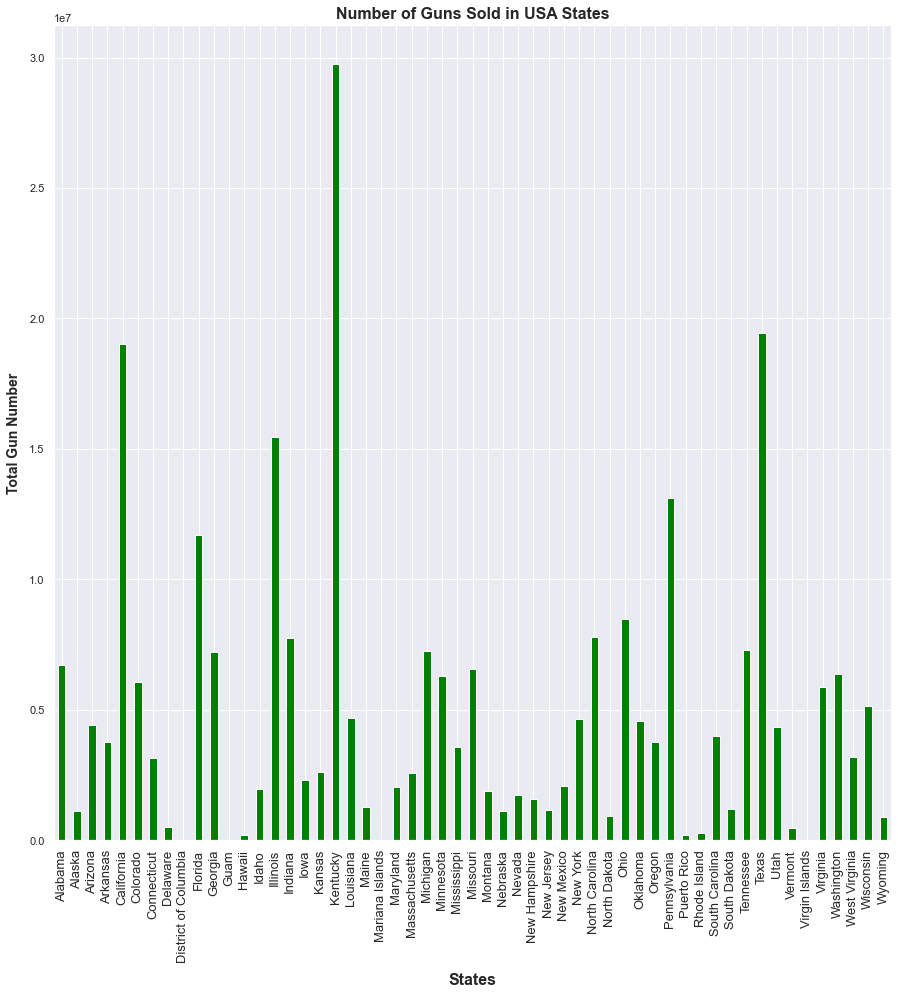

In [142]:
def bar_plot(arg1, arg2, arg3):
    sns.set()
    plt.figure(figsize=(20,10))
    arg1.plot(x='state', kind = 'bar', figsize=(15, 15), color = arg2)
    plt.xticks(rotation=90, fontsize=13)

    plt.title(arg3, fontweight='bold', fontsize=16)
    plt.xlabel('States', labelpad=10, fontweight='bold', fontsize=16)
    plt.ylabel('Total Gun Number', labelpad=8, fontweight='bold', fontsize=14)

bar_plot(total_guns_per_state,"green",'Number of Guns Sold in USA States')

> ### Note:
``` This clearly shows kentucky ranks the highest city with gun purchases ```

## Research Question 2  (Which states have had the highest growth in gun registrations)

In [57]:
total_guns_permits_state = df_gun.groupby('state')['permit'].sum()

total_guns_permits_state

state
Alabama                  1047441
Alaska                     13352
Arizona                   710509
Arkansas                  507951
California               6530543
Colorado                  426970
Connecticut              1595270
Delaware                   22720
District of Columbia         330
Florida                  1088802
Georgia                  1786708
Guam                           0
Hawaii                    197321
Idaho                     369220
Illinois                 9498639
Indiana                  2965760
Iowa                     1467974
Kansas                    155471
Kentucky                24926779
Louisiana                  90789
Maine                      17260
Mariana Islands            57717
Maryland                  345839
Massachusetts            1365225
Michigan                 3313076
Minnesota                2453637
Mississippi                99945
Missouri                  459241
Montana                   145138
Nebraska                  557192
Neva

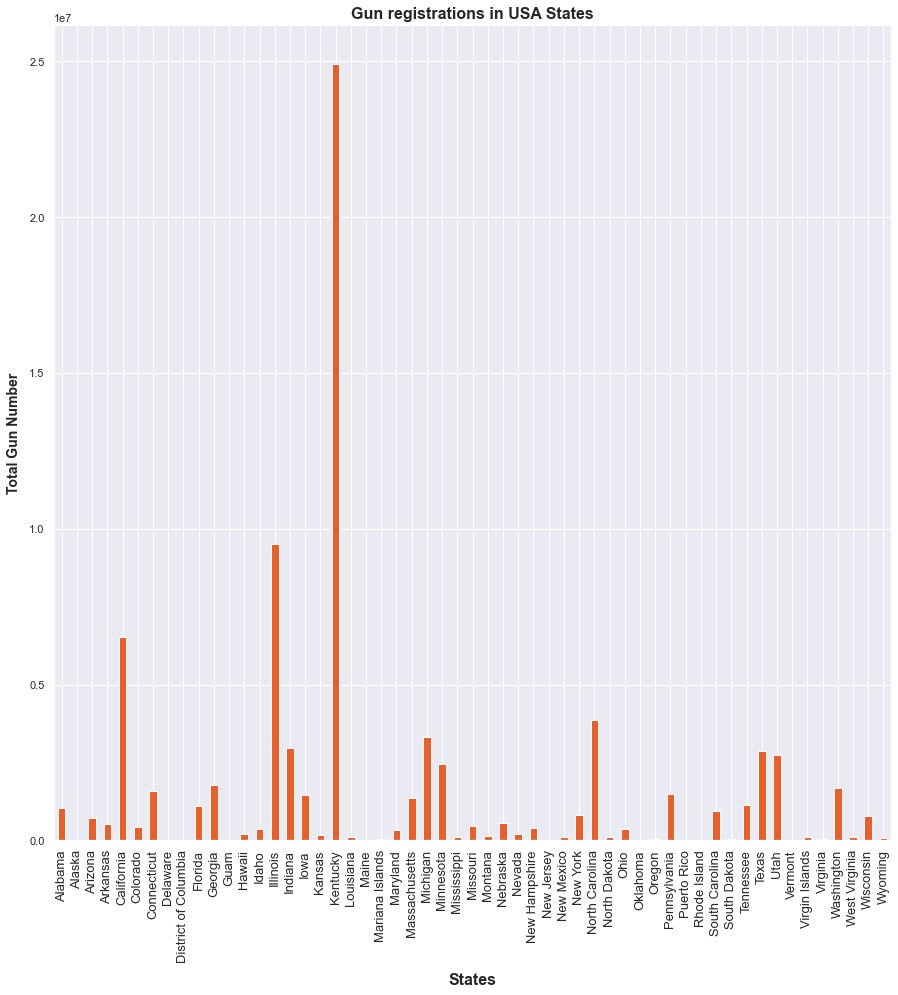

In [143]:
bar_plot(total_guns_permits_state,"#EB5E28",'Gun registrations in USA States')

> ### Note:
``` Here kentucky ranks the highest city with gun registrations which could be tailored to the fact that they also rank the highest in gun purchase ```

## Research Question 3 (What is the overall trend of gun purchases?)

In [59]:
df_gun.head()

year  months  day       state  permit  permit_recheck  handgun  long_gun  \
0  2017       9    1     Alabama   16717               0     5734      6320   
1  2017       9    1      Alaska     209               2     2320      2930   
2  2017       9    1     Arizona    5069             382    11063      7946   
3  2017       9    1    Arkansas    2935             632     4347      6063   
4  2017       9    1  California   57839               0    37165     24581   

   other  multiple  ...  returned_other  rentals_handgun  rentals_long_gun  \
0    221       317  ...               0                0                 0   
1    219       160  ...               0                0                 0   
2    920       631  ...               0                0                 0   
3    165       366  ...               0                0                 0   
4   2984         0  ...               0                0                 0   

   private_sale_handgun  private_sale_long_gun  private_sale_other  \
0                     9                     16                   3   
1                    17                     24                   1   
2                    38                     12                   2   
3                    13                     23                   0   
4                     0                      0                   0   

   return_to_seller_handgun  return_to_seller_long_gun  \
0                         0                          0   
1                         0                          0   
2                         0                          0   
3                         0                          2   
4                         0                          0   

   return_to_seller_other  totals  
0                       3   32019  
1                       0    6303  
2                       0   28394  
3                       1   17747  
4                       0  123506  

[5 rows x 29 columns]

In [60]:
gun_purchase_trend = df_gun.groupby(['year'])[['handgun', 'long_gun', 'other']].sum()

gun_purchase_trend

handgun  long_gun   other
year                           
1998   225939    590601   39600
1999  2578318   5272121  237600
2000  2191879   4779978  237600
2001  2167213   4943375  237600
2002  1845112   4409311  237600
2003  1857018   4390867  237600
2004  1996400   4514657  237600
2005  2301140   4654752  237600
2006  2441325   4789591  237600
2007  2635629   4570697  237600
2008  3331199   4907967  237600
2009  3689604   4978641  122208
2010  3678001   4842184   52761
2011  4301389   5445966   70137
2012  5682963   6866225  162823
2013  6387502   7128798  212776
2014  6199243   5543371  268263
2015  7333808   5479441  329499
2016  8085498   5988511  586137
2017  5242703   3421362  276990

In [61]:
gun_purchase_trend.dtypes

handgun     int32
long_gun    int32
other       int32
dtype: object

Text(0, 0.5, 'Total Volume of Gun')

<Figure size 1080x360 with 0 Axes>

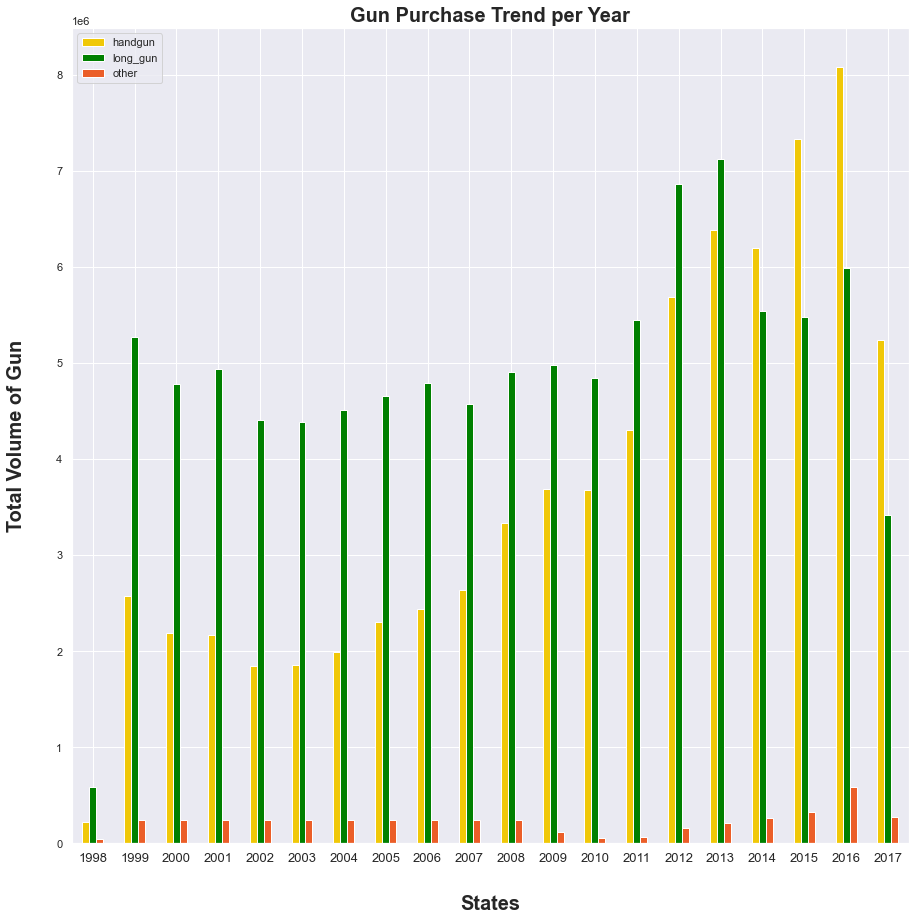

In [148]:
c = ['#F0C808', 'green','#EB5E28']
sns.set()
plt.figure(figsize=(15,5))
gun_purchase_trend.plot(kind = 'bar', figsize=(15, 15) , color = c)
plt.xticks(rotation=0, fontsize=13)

plt.title('Gun Purchase Trend per Year', fontweight='bold', fontsize=20)
plt.xlabel('States', labelpad=30, fontweight='bold', fontsize=20)
plt.ylabel('Total Volume of Gun', labelpad=30, fontweight='bold', fontsize=20)

> ### Note:
``` It's interesting to note that there is an increase in gun sales every year and 2016 witnessed the highest total of handgun purchased and 2013 significantly showed more longgun purchase than any other type of gun. This could be further investigated to find out what factors led to the increase ```

## Research Question 4 (Ratio of Firms owned by veterans and Non-veterans)

### Removing columns not needed

In [63]:
#  We list the columns we are looking to consider
df_census.columns[56:63]

Index(['All firms, 2012', 'Men-owned firms, 2012', 'Women-owned firms, 2012',
       'Minority-owned firms, 2012', 'Nonminority-owned firms, 2012',
       'Veteran-owned firms, 2012', 'Nonveteran-owned firms, 2012'],
      dtype='object')

In [64]:
#  creating a new dataframe for the columns we need
df_census_new = df_census.iloc[:, [0,56,57,58,59,60,61,62,63]]

df_census_new.head()

state All firms, 2012 Men-owned firms, 2012 Women-owned firms, 2012  \
0     Alabama         374,153               203,604                 137,630   
1      Alaska          68,032                35,402                  22,141   
2     Arizona         499,926               245,243                 182,425   
3    Arkansas         231,959               123,158                  75,962   
4  California       3,548,449             1,852,580               1,320,085   

  Minority-owned firms, 2012 Nonminority-owned firms, 2012  \
0                     92,219                       272,651   
1                     13,688                        51,147   
2                    135,313                       344,981   
3                     35,982                       189,029   
4                  1,619,857                     1,819,107   

  Veteran-owned firms, 2012 Nonveteran-owned firms, 2012  \
0                    41,943                      316,984   
1                     7,953                       56,091   
2                    46,780                      427,582   
3                    25,915                      192,988   
4                   252,377                    3,176,341   

  Population per square mile, 2010  
0                             94.4  
1                              1.2  
2                             56.3  
3                               56  
4                            239.1

In [65]:
df_census_new = df_census_new[['state','Veteran-owned firms, 2012', 'Nonveteran-owned firms, 2012']]

df_census_new.columns.name = None
df_census_new = df_census_new.reset_index(drop=True)
df_census_new

state Veteran-owned firms, 2012 Nonveteran-owned firms, 2012
0          Alabama                    41,943                      316,984
1           Alaska                     7,953                       56,091
2          Arizona                    46,780                      427,582
3         Arkansas                    25,915                      192,988
4       California                   252,377                    3,176,341
5         Colorado                    51,722                      469,524
6      Connecticut                    31,056                      281,182
7         Delaware                     7,206                       60,318
8          Florida                   185,756                    1,846,686
9          Georgia                    96,787                      800,585
10          Hawaii                    11,148                      101,334
11           Idaho                    12,804                      124,314
12        Illinois                    89,110                    1,006,885
13         Indiana                    45,174                      412,543
14            Iowa                    25,889                      217,779
15          Kansas                    21,610                      203,401
16        Kentucky                    33,208                      282,704
17       Louisiana                    42,211                      354,460
18           Maine                    15,689                      115,839
19        Maryland                    50,976                      462,232
20   Massachusetts                    58,339                      525,667
21        Michigan                    71,861                      733,517
22       Minnesota                    45,582                      419,628
23     Mississippi                    26,789                      198,566
24        Missouri                    49,217                      415,542
25         Montana                    11,486                       93,393
26        Nebraska                    16,693                      137,254
27          Nevada                    23,049                      191,293
28   New Hampshire                    16,119                      108,817
29      New Jersey                    57,996                      707,975
30      New Mexico                     14096                       128693
31        New York                    137532                      1811544
32  North Carolina                     86571                       684743
33    North Dakota                      6584                        56904
34            Ohio                     91316                       776193
35        Oklahoma                     36273                       273491
36          Oregon                     30918                       288790
37    Pennsylvania                     97969                       837792
38    Rhode Island                      9904                        79837
39  South Carolina                     47987                       303137
40    South Dakota                      8604                        66219
41       Tennessee                     59379                       469392
42           Texas                   213,590                    2,057,218
43            Utah                    18,754                      219,807
44         Vermont                     8,237                       63,317
45        Virginia                    76,434                      548,439
46      Washington                    49,331                      461,401
47   West Virginia                    12,912                       94,960
48       Wisconsin                    39,830                      370,755
49         Wyoming                     6,470                       51,353

### Top 10 US states of Veterans and Non-veterans owning firms

In [66]:
df_census_new.dtypes

state                           object
Veteran-owned firms, 2012       object
Nonveteran-owned firms, 2012    object
dtype: object

In [67]:
census_new_column = list(df_census_new.iloc[:,1:].columns)
for p in census_new_column:
    df_census_new[p] = df_census_new[p].str.extract('(\d+)').astype('int')

In [68]:
df_census_new.dtypes

state                           object
Veteran-owned firms, 2012        int32
Nonveteran-owned firms, 2012     int32
dtype: object

In [69]:
df_census_new_top10 = df_census_new.sort_values(by=['Veteran-owned firms, 2012', 'Nonveteran-owned firms, 2012'], ascending = False)[0:10]
df_census_new_top10

state  Veteran-owned firms, 2012  Nonveteran-owned firms, 2012
31        New York                     137532                       1811544
37    Pennsylvania                      97969                        837792
34            Ohio                      91316                        776193
32  North Carolina                      86571                        684743
41       Tennessee                      59379                        469392
39  South Carolina                      47987                        303137
35        Oklahoma                      36273                        273491
36          Oregon                      30918                        288790
30      New Mexico                      14096                        128693
38    Rhode Island                       9904                         79837

Text(0, 0.5, 'Number of owned firms')

<Figure size 1080x1080 with 0 Axes>

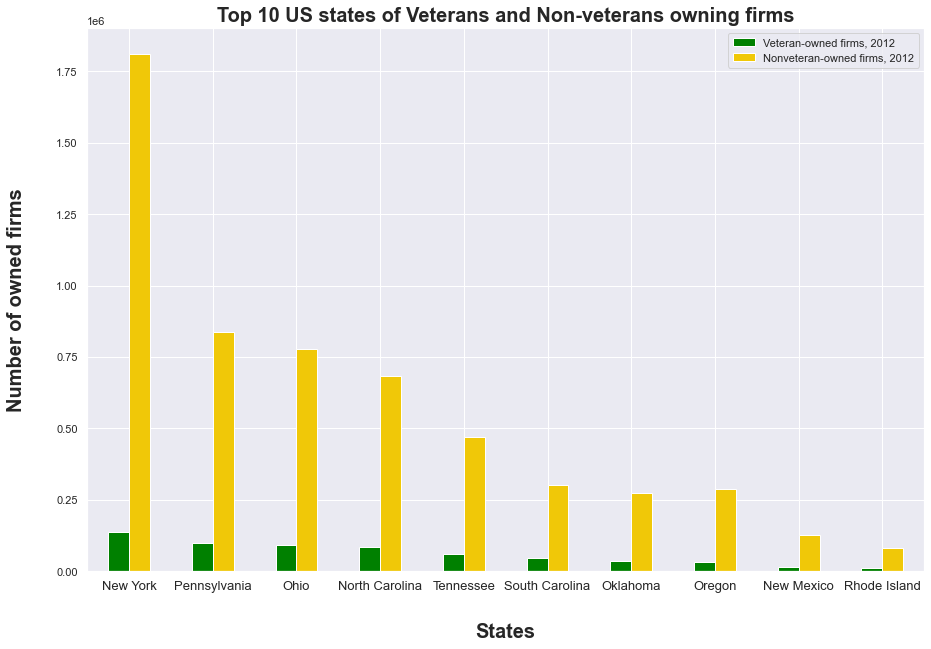

In [79]:
c = ['green','#F0C808']
sns.set()
plt.figure(figsize=(15,15))
df_census_new_top10.plot(x= 'state', y=['Veteran-owned firms, 2012', 'Nonveteran-owned firms, 2012'], kind = 'bar', figsize=(15, 10) , color = c)
plt.xticks(rotation=0, fontsize=13)

plt.title('Top 10 US states of Veterans and Non-veterans owning firms', fontweight='bold', fontsize=20)
plt.xlabel('States', labelpad=30, fontweight='bold', fontsize=20)
plt.ylabel('Number of owned firms', labelpad=30, fontweight='bold', fontsize=20)

> ### Note:
``` Newyork ranks the highest for veterans and non-vetrans with more firms ```

## Ratio of Veterans owning firms

<AxesSubplot:title={'center':'Ratio of Veterans owning firms'}, ylabel='None'>

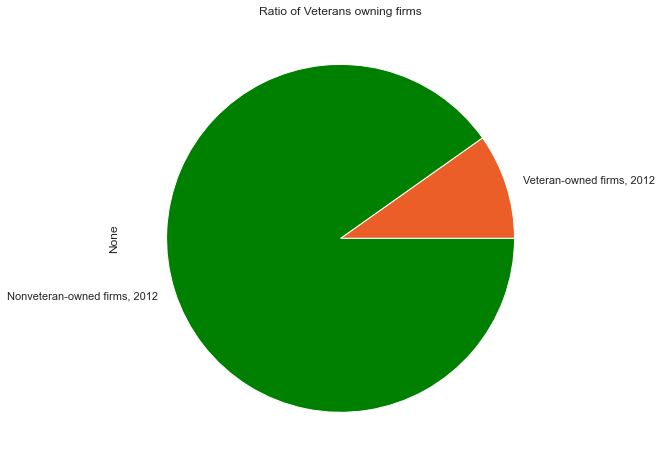

In [132]:
plt.title('Ratio of Veterans owning firms')
colors = ["#EB5E28", "green"]
df_census_new[['Veteran-owned firms, 2012','Nonveteran-owned firms, 2012']].sum().plot(kind='pie', figsize=(8, 8),colors=colors)

> ### Note:
``` This clearly shows there are more Non-veterans owning firms than veterans. This might be a point of concern as this might prove the high volume of misuse ```

## Research Question 5 (Total gun purchase per month)

In [71]:
df_gun_permonth = df_gun.groupby('months')['totals'].sum()

df_gun_permonth

months
1     22594354
2     24386459
3     25357927
4     21322573
5     18918200
6     18567565
7     18724372
8     20866499
9     21622897
10    22460456
11    24479566
12    30321770
Name: totals, dtype: int64

Text(0, 0.5, 'Volume of gun purchased')

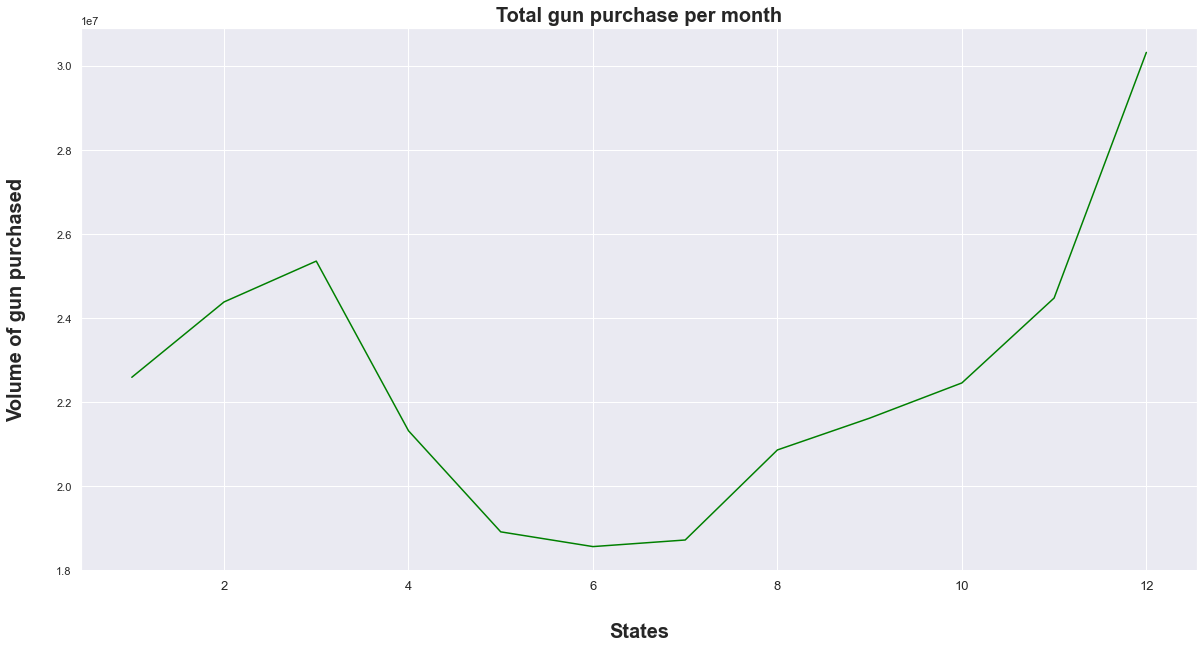

In [87]:
c = ['green']
sns.set()
plt.figure(figsize=(15,15))
df_gun_permonth.plot(x= 'state', kind = 'line', figsize=(20, 10) , color = c)
plt.xticks(rotation=0, fontsize=13)

plt.title('Total gun purchase per month', fontweight='bold', fontsize=20)
plt.xlabel('States', labelpad=30, fontweight='bold', fontsize=20)
plt.ylabel('Volume of gun purchased', labelpad=30, fontweight='bold', fontsize=20)

> ### Note:
``` There is a drop in gun purchases between May, June and July while December ranks the highest month in gun purchases. ```

In [134]:
df_gun.head()

year  months  day       state  permit  permit_recheck  handgun  long_gun  \
0  2017       9    1     Alabama   16717               0     5734      6320   
1  2017       9    1      Alaska     209               2     2320      2930   
2  2017       9    1     Arizona    5069             382    11063      7946   
3  2017       9    1    Arkansas    2935             632     4347      6063   
4  2017       9    1  California   57839               0    37165     24581   

   other  multiple  ...  returned_other  rentals_handgun  rentals_long_gun  \
0    221       317  ...               0                0                 0   
1    219       160  ...               0                0                 0   
2    920       631  ...               0                0                 0   
3    165       366  ...               0                0                 0   
4   2984         0  ...               0                0                 0   

   private_sale_handgun  private_sale_long_gun  private_sale_other  \
0                     9                     16                   3   
1                    17                     24                   1   
2                    38                     12                   2   
3                    13                     23                   0   
4                     0                      0                   0   

   return_to_seller_handgun  return_to_seller_long_gun  \
0                         0                          0   
1                         0                          0   
2                         0                          0   
3                         0                          2   
4                         0                          0   

   return_to_seller_other  totals  
0                       3   32019  
1                       0    6303  
2                       0   28394  
3                       1   17747  
4                       0  123506  

[5 rows x 29 columns]

In [137]:
gun_data_by_year = df_gun.groupby('months')['handgun', 'long_gun'].apply(lambda x: x.astype(float).sum())

gun_data_by_year

C:\Users\HP\AppData\Local\Temp\ipykernel_2804\2345831121.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  gun_data_by_year = df_gun.groupby('months')['handgun', 'long_gun'].apply(lambda x: x.astype(float).sum())


handgun    long_gun
months                       
1       6517686.0   7254588.0
2       7586539.0   7793691.0
3       7404506.0   8143436.0
4       6133381.0   6718990.0
5       5450685.0   5623974.0
6       5299814.0   5568488.0
7       5253951.0   5683715.0
8       5572592.0   7532225.0
9       5388650.0   8568621.0
10      5392930.0   9469396.0
11      5926540.0  11190385.0
12      8244609.0  13970907.0

#### Scatter plot showing total gun sales per year

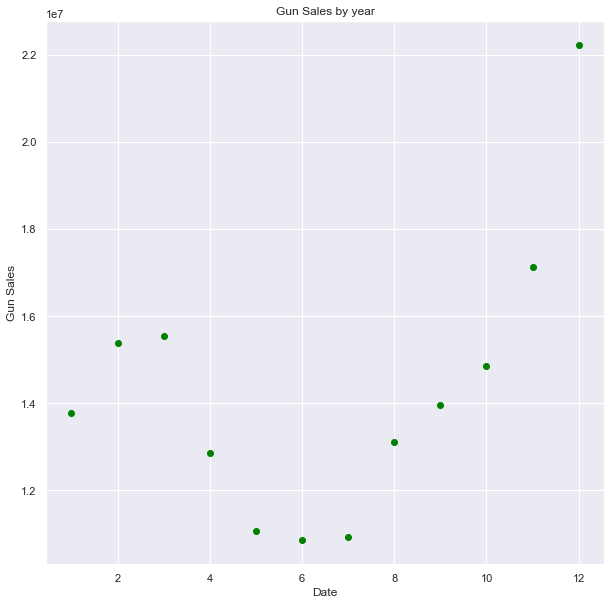

In [141]:
# plotting the total gun sales (handgun + long gun) by date overtime
fig, ax = plt.subplots(figsize = (10, 10))

ax.scatter(gun_data_by_year.index.values, gun_data_by_year['handgun'] + gun_data_by_year['long_gun'], color = 'green')

ax.set(xlabel = 'Date', ylabel ='Gun Sales', title = 'Gun Sales by year')

plt.show()

> ### Note:
``` This shows a scatter plot of total gun sales per year with December as the 12th month ranking the highest ```

<a id='conclusions'></a>
## Conclusions

- There is an increase in guns sales every year and 2016 witnessed the highest total of gun purchased.
- Kentucky is the highest in total guns sales 
- The most purchased guns are "hand guns"
- We have more non-veterans with gun firms than veterans
- There is a drop in gun purchases between May,June and July while December ranks the highest month in gun purchases.\
- Kentucky ranks highest in gun registration
- Newyork ranks the highest for veterans with more firms

> ### Limitations
* Some of the Limitations encountered while investigating the data set was a series of null values replaced with mean values
* Duplicated data in census table and a couple of data cleaning to do adjusting column headers
